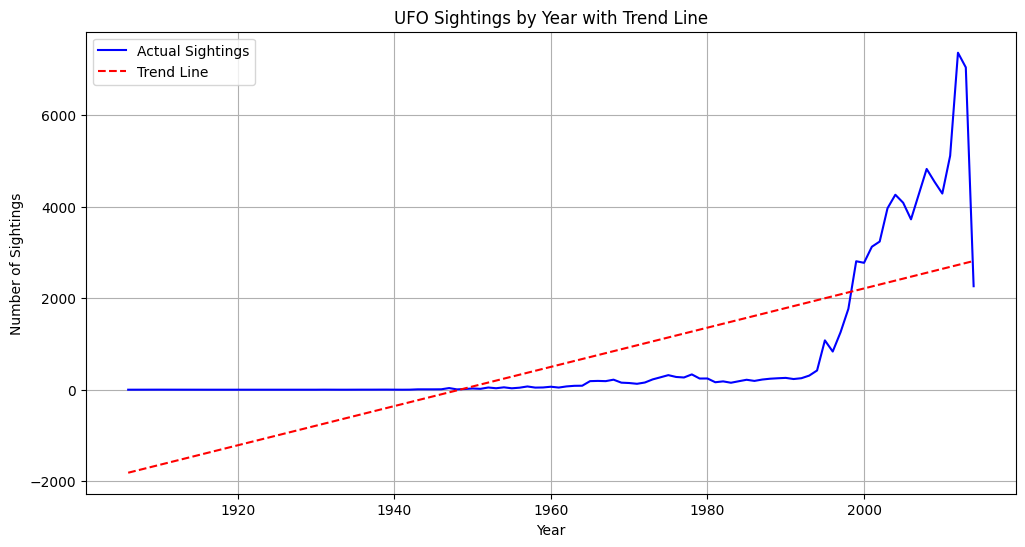

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.stats as stats
import seaborn as sns

# 讀取CSV文件
ufo_data = pd.read_csv('C:/Users/Jackie/python1121/env/FINAL/ufo-sightings-transformed.csv')


# 處理日期數據
ufo_data['Year'] = pd.to_datetime(ufo_data['Date_time']).dt.year

# NO-1 UFO Sightings by Year with Trend Line
# 按年份分組並計算每年的目擊事件數
yearly_counts = ufo_data.groupby('Year').size()

# 線性回歸分析
X = yearly_counts.index.values.reshape(-1, 1)  # 年份
y = yearly_counts.values  # 目擊事件數量
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# 繪製折線圖和趨勢線
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, color='blue', label='Actual Sightings')
plt.plot(X, y_pred, color='red', linestyle='--', label='Trend Line')
plt.title('UFO Sightings by Year with Trend Line')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.legend()
plt.grid(True)
plt.show()


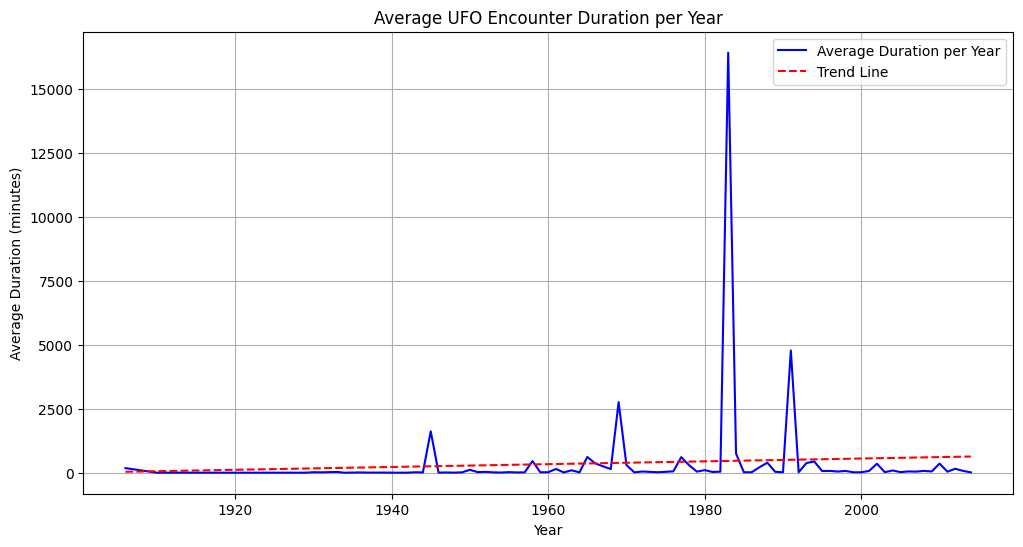

In [2]:
# NO-2 Average UFO Encounter Duration per Year
# 轉換日期和持續時間數據
ufo_data['Year'] = pd.to_datetime(ufo_data['Date_time']).dt.year
ufo_data['Duration_minutes'] = ufo_data['length_of_encounter_seconds'] / 60  # 將秒轉換為分鐘

# 按年份分組並計算每年的平均持續時間
average_duration_per_year = ufo_data.groupby('Year')['Duration_minutes'].mean()

# 線性回歸分析
X = average_duration_per_year.index.values.reshape(-1, 1)  # 年份
y = average_duration_per_year.values  # 持續時間
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# 繪製折線圖和趨勢線
plt.figure(figsize=(12, 6))
plt.plot(average_duration_per_year.index, average_duration_per_year.values, color='blue', label='Average Duration per Year')
plt.plot(X, y_pred, color='red', linestyle='--', label='Trend Line')
plt.title('Average UFO Encounter Duration per Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.legend()
plt.grid(True)
plt.show()

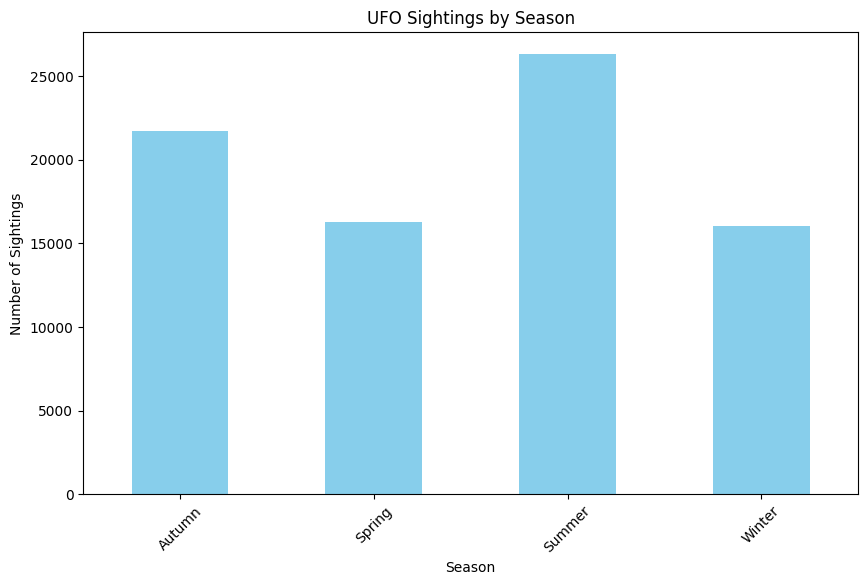

F-value: 0.4393276642936542
P-value: 0.7248679490244438


In [3]:
# NO-3 UFO Sightings by Season
# 按季節分組並計算每個季節的目擊事件數量
sightings_by_season = ufo_data.groupby('Season').size()

# 繪製柱狀圖
sightings_by_season.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('UFO Sightings by Season')
plt.xlabel('Season')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.show()

# 檢測每個季節的目擊事件數量
spring = ufo_data[ufo_data['Season'] == 'Spring']['length_of_encounter_seconds']
summer = ufo_data[ufo_data['Season'] == 'Summer']['length_of_encounter_seconds']
autumn = ufo_data[ufo_data['Season'] == 'Autumn']['length_of_encounter_seconds']
winter = ufo_data[ufo_data['Season'] == 'Winter']['length_of_encounter_seconds']

# 進行ANOVA
f_value, p_value = stats.f_oneway(spring, summer, autumn, winter)
print('F-value:', f_value)
print('P-value:', p_value)

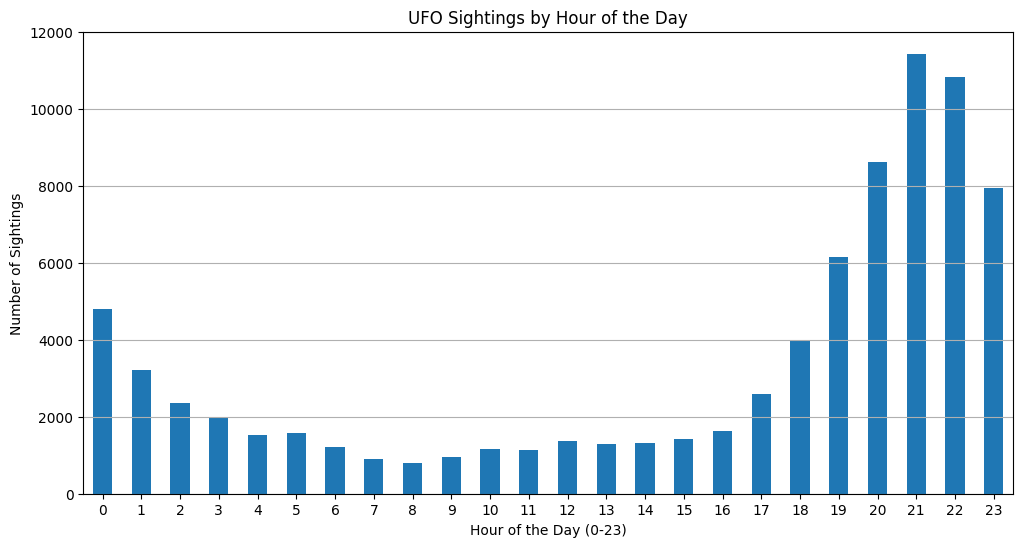

In [5]:
# NO-4  UFO Sightings by Hour of the Day
# Count the number of sightings for each hour
hourly_counts = ufo_data['Hour'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar')
plt.title('UFO Sightings by Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

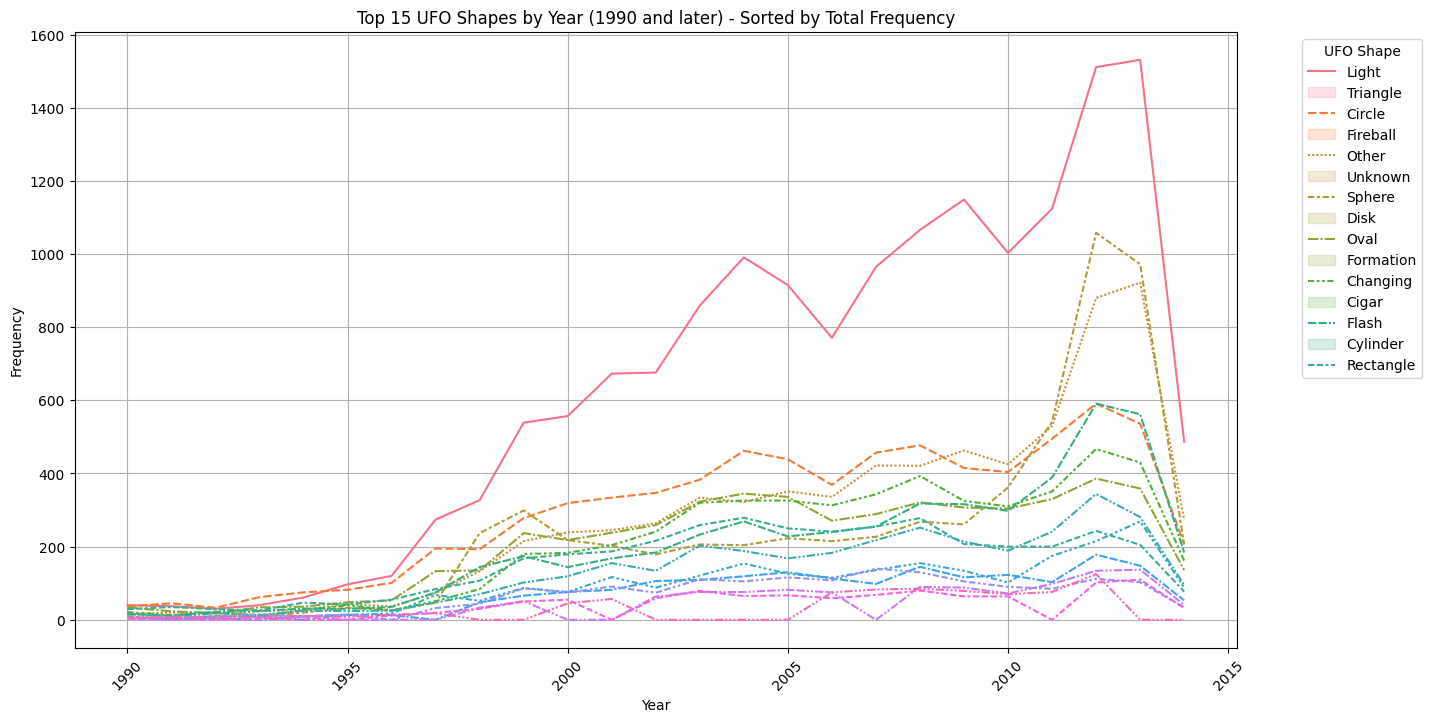

In [6]:
# NO-5  Top 15 UFO Shapes by Year (1990 and later)
# Re-loading the UFO sightings data and filtering for years 1990 and later
ufo_data_filtered = ufo_data[ufo_data['Year'] >= 1990]

# Grouping by Year and UFO Shape
ufo_shape_counts = ufo_data_filtered.groupby(['Year', 'UFO_shape']).size().reset_index(name='Count')

# For each year, find the top 15 UFO shapes
top_ufo_shapes_by_year = ufo_shape_counts.groupby('Year').apply(lambda x: x.nlargest(15, 'Count')).reset_index(drop=True)

# Pivot table for easier plotting
pivot_table = top_ufo_shapes_by_year.pivot(index='Year', columns='UFO_shape', values='Count').fillna(0)

# Calculating total frequency for each UFO shape over all years
total_frequency_per_shape = pivot_table.sum().sort_values(ascending=False)

# Selecting the top UFO shapes based on total frequency
top_shapes = total_frequency_per_shape.head(15).index

# Plotting with sorted legend
plt.figure(figsize=(15, 8))
sns.lineplot(data=pivot_table[top_shapes])

plt.title('Top 15 UFO Shapes by Year (1990 and later) - Sorted by Total Frequency')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='UFO Shape', labels=top_shapes, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

C:\Users\姚永年\AppData\Local\Temp\ipykernel_18916\2983883924.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ufo_shape_counts.index, rotation=45)


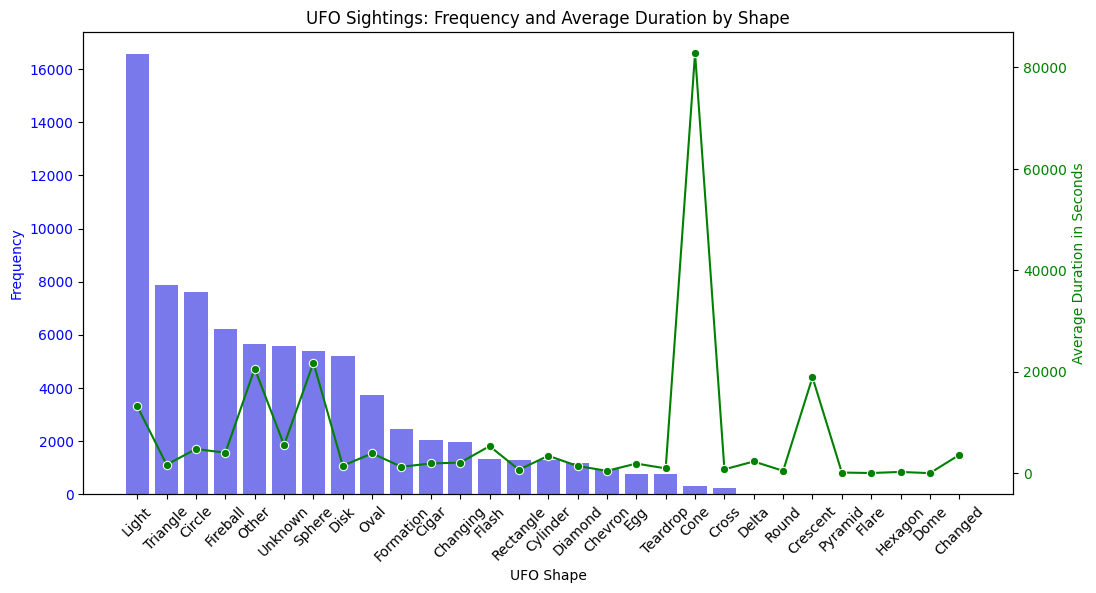

In [11]:
# NO-5 

# Calculate the mean encounter duration for each UFO shape
mean_duration_per_shape = ufo_data.groupby('UFO_shape')['length_of_encounter_seconds'].mean()

# Prepare the data for bar plot (frequency)
ufo_shape_counts = ufo_data['UFO_shape'].value_counts()

# Create figure and first axis for the bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x=ufo_shape_counts.index, y=ufo_shape_counts.values, ax=ax1, color='blue', alpha=0.6)
ax1.set_xlabel('UFO Shape')
ax1.set_ylabel('Frequency', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ufo_shape_counts.index, rotation=45)

# Create second axis for the line plot
ax2 = ax1.twinx()
sns.lineplot(x=mean_duration_per_shape.index, y=mean_duration_per_shape.values, ax=ax2, color='green', marker='o')
ax2.set_ylabel('Average Duration in Seconds', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and show plot
plt.title('UFO Sightings: Frequency and Average Duration by Shape')
plt.show()

In [10]:

# 計算每種UFO形狀的目擊頻率
ufo_shape_counts = ufo_data['UFO_shape'].value_counts()

# 計算每種UFO形狀的平均持續時間
mean_duration_per_shape = ufo_data.groupby('UFO_shape')['length_of_encounter_seconds'].mean()

# 顯示頻率最高的前五種UFO形狀
top_shapes_by_frequency = ufo_shape_counts.head()

# 顯示平均持續時間最長的前五種UFO形狀
top_shapes_by_duration = mean_duration_per_shape.sort_values(ascending=False).head()

# 顯示結果
print("頻率最高的UFO形狀:")
print(top_shapes_by_frequency)
print("\n平均持續時間最長的UFO形狀:")
print(top_shapes_by_duration)


頻率最高的UFO形狀：
UFO_shape
Light       16565
Triangle     7865
Circle       7607
Fireball     6208
Other        5649
Name: count, dtype: int64

平均持續時間最長的UFO形狀：
UFO_shape
Cone        82827.405063
Sphere      21787.298238
Other       20634.210977
Crescent    18905.000000
Light       13170.345373
Name: length_of_encounter_seconds, dtype: float64
